Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo encontrado: /content/drive/My Drive/lab 2/0284_001_004_EEG.hea
0284_001_004_EEG 19 500 1578500
0284_001_004_EEG.mat 16+24 17.980017665549088(23877)/nu 16 0 24177 -9802 0 Fp1
0284_001_004_EEG.mat 16+24 17.747962055418498(23144)/nu 16 0 25579 -1248 0 Fp2
0284_001_004_EEG.mat 16+24 15.71809151860282(16747)/nu 16 0 17350 -9939 0 F3
0284_001_004_EEG.mat 16+24 269.9389283253154(24279)/nu 16 0 -2188 19141 0 F4
0284_001_004_EEG.mat 16+24 698.3019922526984(-3375)/nu 16 0 -16809 2874 0 C3
0284_001_004_EEG.mat 16+24 697.5761065469161(2589)/nu 16 0 15532 32655 0 C4
0284_001_004_EEG.mat 16+24 701.9541996236107(-891)/nu 16 0 -7609 -6860 0 P3
0284_001_004_EEG.mat 16+24 49.64623711994421(30600)/nu 16 0 28835 -18301 0 P4
0284_001_004_EEG.mat 16+24 276.2734382807173(16282)/nu 16 0 12613 19441 0 O1
0284_001_004_EEG.mat 16+24 224.5126053998151(13034)/nu 16 0 8320 -5442 0

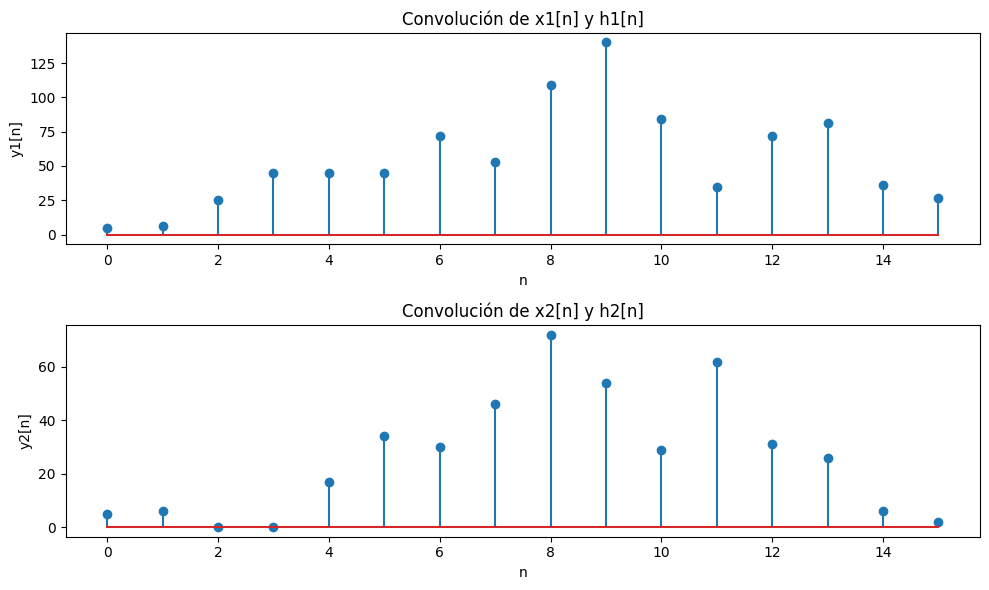

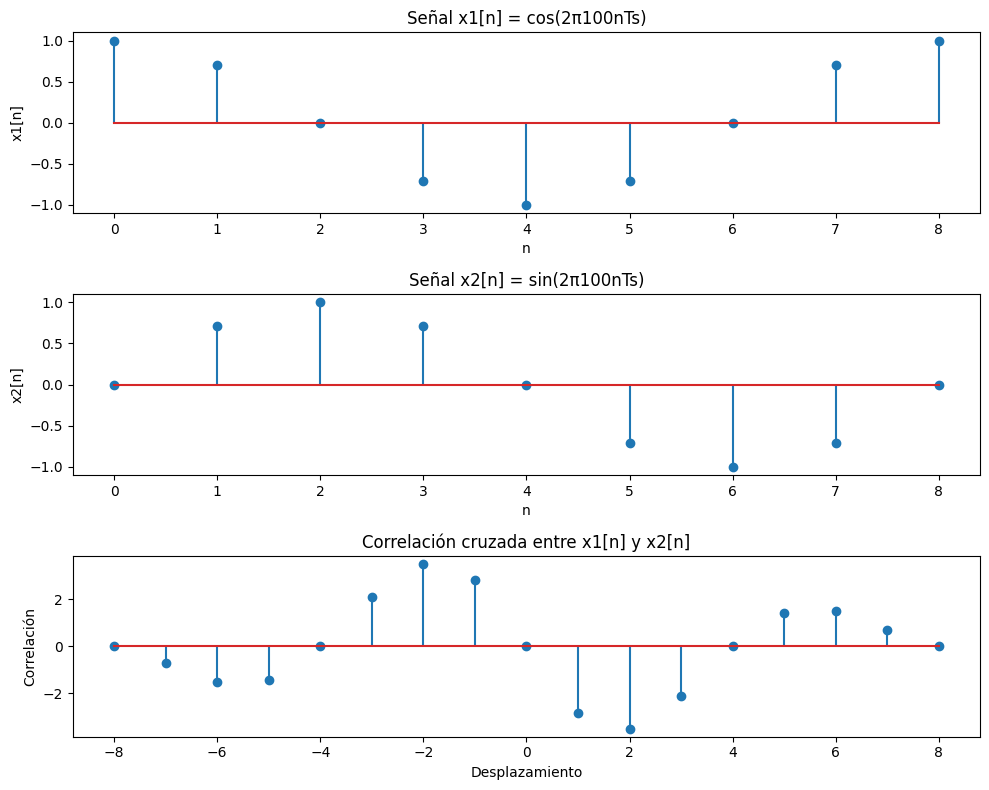

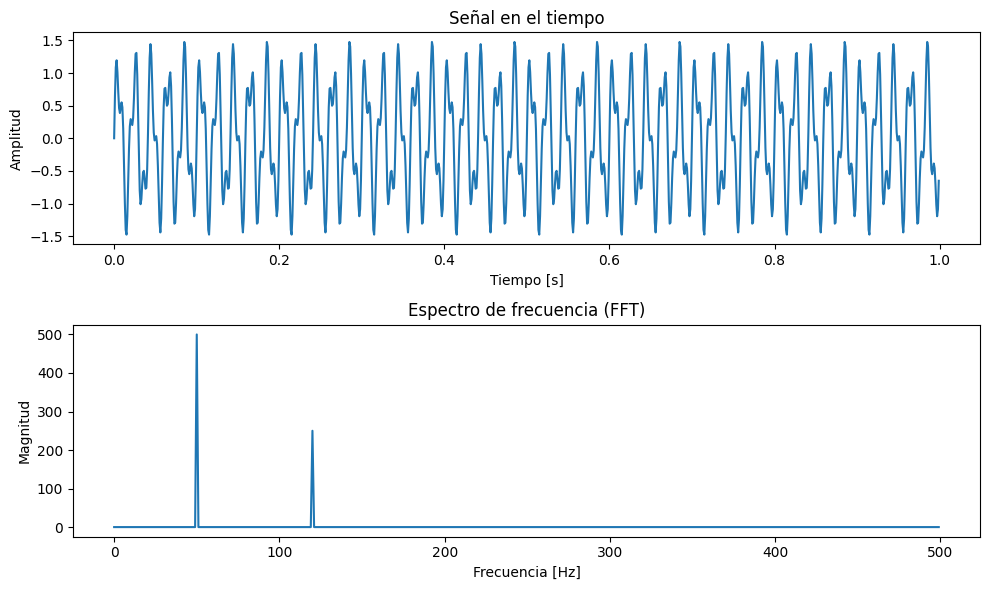

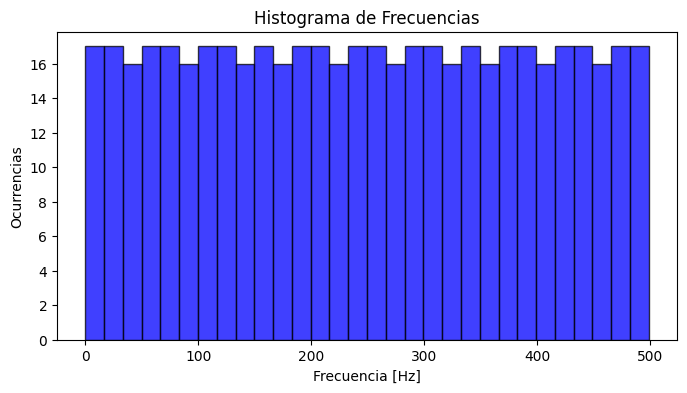

Frecuencia media: 249.50 Hz
Frecuencia mediana: 249.50 Hz
Desviación estándar: 144.34 Hz


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

#  ruta del archivo en Drive
file_path = "/content/drive/My Drive/lab 2/0284_001_004_EEG.hea"

# Verificar si el archivo existe
if os.path.exists(file_path):
    print("Archivo encontrado:", file_path)
else:
    print("Error: Archivo no encontrado.")

# Leer el contenido del archivo .hea
with open(file_path, 'r') as file:
    for line in file:
        print(line.strip())

#  CONVOLUCIÓN

h1 = np.array([5, 6, 0, 0, 7, 1, 3])
x1 = np.array([1, 0, 5, 3, 4, 4, 2, 3, 9, 9])

h2 = np.array([5, 6, 0, 0, 7, 2, 1])
x2 = np.array([1, 0, 0, 0, 2, 4, 1, 8, 2, 2])

# Calcular la convolución
y1 = np.convolve(x1, h1)
y2 = np.convolve(x2, h2)

# Graficar los resultados de la convolución
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].stem(y1)
axs[0].set_title("Convolución de x1[n] y h1[n]")
axs[0].set_xlabel("n")
axs[0].set_ylabel("y1[n]")

axs[1].stem(y2)
axs[1].set_title("Convolución de x2[n] y h2[n]")
axs[1].set_xlabel("n")
axs[1].set_ylabel("y2[n]")

plt.tight_layout()
plt.show()


#  CORRELACIÓN ENTRE SEÑALES


# Definir las señales x1[n] y x2[n]
fs = 1 / (1.25e-3)  # Frecuencia de muestreo
n = np.arange(9)  # 9 muestras

x1_n = np.cos(2 * np.pi * 100 * n * (1.25e-3))
x2_n = np.sin(2 * np.pi * 100 * n * (1.25e-3))

# Calcular la correlación cruzada
corr = correlate(x1_n, x2_n, mode='full')

# Graficar las señales y la correlación
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].stem(n, x1_n)
axs[0].set_title("Señal x1[n] = cos(2π100nTs)")
axs[0].set_xlabel("n")
axs[0].set_ylabel("x1[n]")

axs[1].stem(n, x2_n)
axs[1].set_title("Señal x2[n] = sin(2π100nTs)")
axs[1].set_xlabel("n")
axs[1].set_ylabel("x2[n]")

axs[2].stem(range(-len(n) + 1, len(n)), corr)
axs[2].set_title("Correlación cruzada entre x1[n] y x2[n]")
axs[2].set_xlabel("Desplazamiento")
axs[2].set_ylabel("Correlación")

plt.tight_layout()
plt.show()


#  TRANSFORMADA DE FOURIER Y ANÁLISIS ESPECTRAL


fs = 1000  # Frecuencia de muestreo en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de datos
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # Señal con dos frecuencias

# Calcular la FFT
frequencies = np.fft.fftfreq(len(signal), 1/fs)
fft_values = np.fft.fft(signal)

# Graficar la señal original y su transformada de Fourier
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, signal)
axs[0].set_title("Señal en el tiempo")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud")

axs[1].plot(frequencies[:fs//2], np.abs(fft_values[:fs//2]))  # Solo la parte positiva del espectro
axs[1].set_title("Espectro de frecuencia (FFT)")
axs[1].set_xlabel("Frecuencia [Hz]")
axs[1].set_ylabel("Magnitud")

plt.tight_layout()
plt.show()


# ANÁLISIS ESTADÍSTICO DESCRIPTIVOS DE LA SEÑAL
# ================================

mean_freq = np.mean(frequencies[:fs//2])
median_freq = np.median(frequencies[:fs//2])
std_freq = np.std(frequencies[:fs//2])

# Graficar histograma de frecuencias
plt.figure(figsize=(8, 4))
plt.hist(frequencies[:fs//2], bins=30, alpha=0.75, color='b', edgecolor='black')
plt.title("Histograma de Frecuencias")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Ocurrencias")
plt.show()

# Mostrar estadísticas
print(f"Frecuencia media: {mean_freq:.2f} Hz")
print(f"Frecuencia mediana: {median_freq:.2f} Hz")
print(f"Desviación estándar: {std_freq:.2f} Hz")
